In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [131]:
df= pd.read_csv(r"C:\Users\USER1\Desktop\data_science\GroupDiscussion_Lead\Predict-Sales-Revenue-Using-Multiple-Regression-Model-master\Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [132]:
df.replace('?', np.nan,inplace = True)

In [26]:

missing_val = df.isnull()

In [133]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [134]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [135]:
for col in missing_val.columns.values.tolist():
    print(col)
    print(missing_val[col].value_counts())
    print("")

TV
TV
False    200
Name: count, dtype: int64

radio
radio
False    200
Name: count, dtype: int64

newspaper
newspaper
False    200
Name: count, dtype: int64

sales
sales
False    200
Name: count, dtype: int64



In [136]:
df_corr = df.corr()
df_corr


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


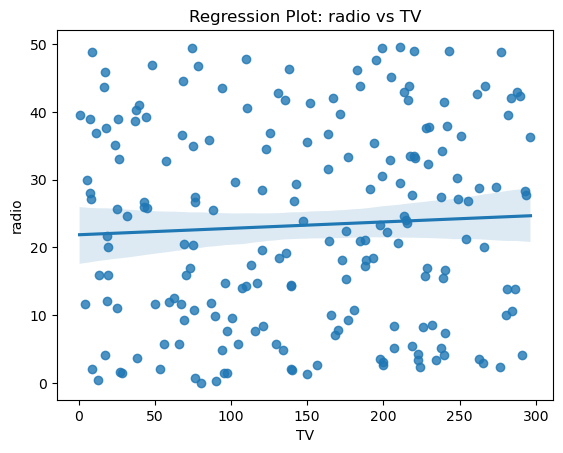

In [140]:
sns.regplot(x='TV', y='radio', data=df)

# Optional: Adding labels and title
plt.xlabel('TV')
plt.ylabel('radio')
plt.title('Regression Plot: radio vs TV')

plt.show()

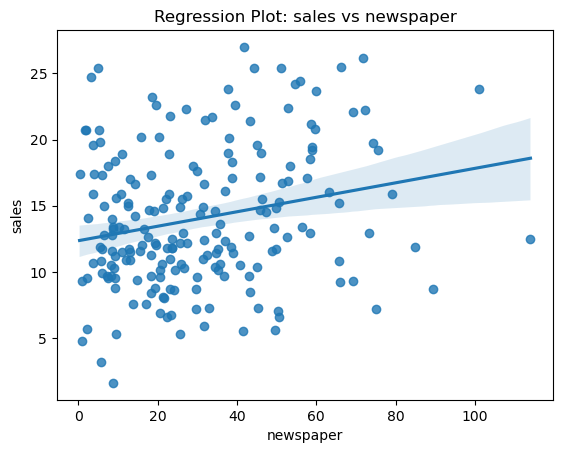

In [139]:
sns.regplot(x='newspaper', y='sales', data=df)

# Optional: Adding labels and title
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.title('Regression Plot: sales vs newspaper')

plt.show()

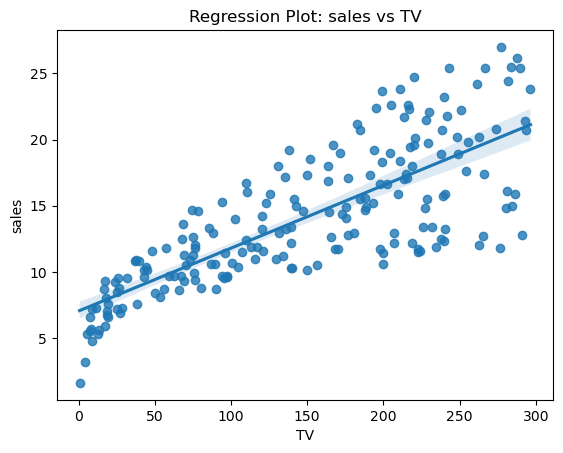

In [142]:
sns.regplot(x='TV', y='sales', data=df)

# Optional: Adding labels and title
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('Regression Plot: sales vs TV')

plt.show()

C:\Users\USER1\.conda\envs\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


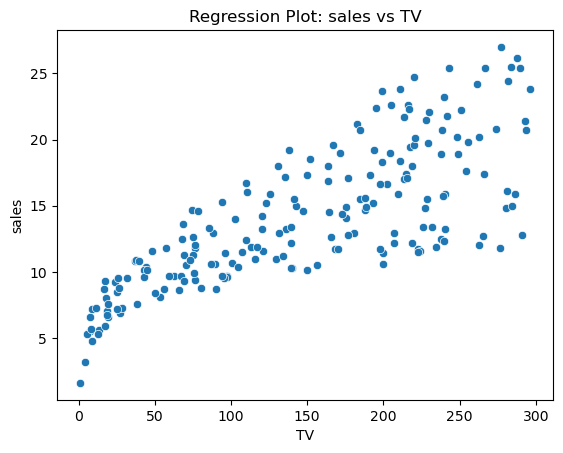

In [141]:
sns.scatterplot(x='TV', y='sales', data=df)

# Optional: Adding labels and title
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('Regression Plot: sales vs TV')

plt.show()

# Pearson Correlation
The Pearson Correlation measures the linear dependence between two variables X and Y. The resulting coefficient is a value between -1 and 1 inclusive, where:

>- 1: Total positive linear correlation.

>- 0: No linear correlation, the two variables most likely do not affect each other.

>- -1: Total negative linear correlation.

In [39]:
from scipy import stats

### P-values explanation

- when the p-value is < 0.001: we say there is strong evidence that the correlation is significant.

- the p-value is < 0.05: there is moderate evidence that the correlation is significant.

- the p-value is < 0.1: there is weak evidence that the correlation is significant.

- the p-value is> 0.1: there is no evidence that the correlation is significant.

In [143]:
p_coef, p_value = stats.pearsonr(df['TV'], df['sales'])
print('The Person Correlation Coefficient is', p_coef , 'and the p-value is =  ', p_value)

The Person Correlation Coefficient is 0.7822244248616064 and the p-value is =   1.4673897001947286e-42


# Conclusion:
Since the p-value is  <
  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.782, close to 1)

In [44]:
p_coef, p_value = stats.pearsonr(df['radio'], df['TV'])
print('The Person Correlation Coefficient is', p_coef , 'and the p-value is =  ', p_value)

The Person Correlation Coefficient is 0.0548086644658301 and the p-value is =   0.440806063788431


# Conclusion:
Since the p-value is  > 0.1, there is no evidence that the  correlation between TV and radio is statistically significant. And linear relationship is 0.0548 far from 1

# Linear regression

In [45]:
from sklearn.linear_model import LinearRegression

In [144]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [145]:
x = df[['TV']]
y = df['sales']
lm1.fit(x,y)

C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

LinearRegression()

In [146]:
pred = lm1.predict(x)
pred[0:10]

C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [147]:
print('coefficient:', lm1.coef_)
print('intercept:',lm1.intercept_)

coefficient: [0.04753664]
intercept: 7.032593549127693


y = 7.03 + 0.04x

# Multiple Regression


In [148]:
Z = df[['TV', 'radio', 'newspaper']]
y = df['sales']
lm1.fit(Z,y)
pred = lm1.predict(Z)
pred[0:5]

C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186])

In [149]:
print('intercept:', lm1.intercept_)
print('coefficient:', lm1.coef_)

intercept: 2.9388893694594067
coefficient: [ 0.04576465  0.18853002 -0.00103749]


y = 2.94 + 0.046[TV] + 0.188[radio] - 0.001[newspaper]

C:\Users\USER1\AppData\Local\Temp\ipykernel_29440\1654066146.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['sales'], hist=False, color="r", label="Actual Value")
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

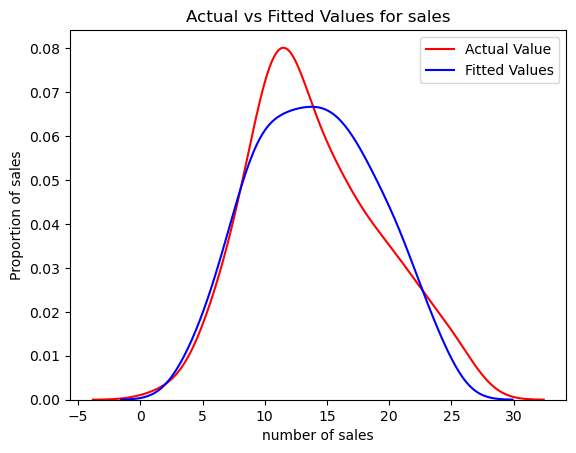

In [150]:
ax1 = sns.distplot(df['sales'], hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.legend()

plt.title('Actual vs Fitted Values for sales')
plt.xlabel('number of sales')
plt.ylabel('Proportion of sales')
plt.show()
plt.close()

###### We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit.

# Polynomial Regression

In [159]:
x = df['TV']
y = df['sales']
f = np.polyfit(x,y,8) # here we are using numpy beacuse it is now any array ( degree 3)
func1 = np.poly1d(f) # converting the array to 1d again
print('Polynomial function:')
print(func1)

Polynomial function:
            8             7             6             5             4
-1.924e-17 x + 3.065e-14 x - 1.957e-11 x + 6.643e-09 x - 1.323e-06 x
             3           2
 + 0.000158 x - 0.01089 x + 0.4306 x + 2.477


In [160]:

def PlotPolly(model, independent_variable, dependent_variable, Name):
    # Generate new x values for smoother plot
    x_new = np.linspace(min(independent_variable), max(independent_variable), 100)
    
    # Use the model to predict y values for the new x values
    y_new = model(x_new)
    
    # Plot the original data points and the polynomial fit
    plt.plot(independent_variable, dependent_variable, '.', label='Original Data')
    plt.plot(x_new, y_new, '-', label='Polynomial Fit')
    
    # Customize plot
    plt.title('Polynomial Fit with Matplotlib')
    plt.xlabel(Name)
    plt.ylabel('House Sales')
    plt.legend()  # Add legend
    
    plt.show()  # Display plot


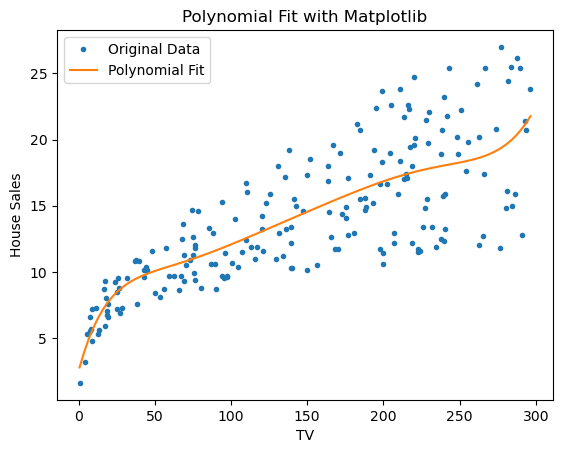

In [161]:
PlotPolly(func1, x, y, 'TV')

In [162]:
np.polyfit(x,y,3)

array([ 5.57199796e-07, -3.15222433e-04,  9.64341770e-02,  5.42010655e+00])

In [163]:
from sklearn.metrics import mean_squared_error

In [164]:
x = df[['TV']]
y = df['sales']
lm1.fit(x,y)
print("R-Square error is", lm1.score(x,y))

R-Square error is 0.611875050850071


C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

In [165]:
Z = df[['TV','radio','newspaper']]
y= df['sales']
lm1.fit(Z,y)
print("R squared error is ", lm1.score(Z, y))

R squared error is  0.8972106381789522


C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

In [102]:
from sklearn.metrics import r2_score

In [166]:
from sklearn.metrics import mean_squared_error

mse2 = mean_squared_error(y, p(x))
print("MSE is", mse2)


MSE is 10.211310187666074


C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [167]:
r_square = r2_score(y,p(x))
print("the r-squared error is", r_square)

the r-squared error is 0.6230005614054415


C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER1\.conda\envs\Python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
